# Hyper-Paramters Testting

In [1]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
import imp
import utils
import torch.optim as optim
import numpy as np
imp.reload(utils)
from sklearn.manifold import TSNE
INPUT_DIM = 2048
OUTPUT_DIM = 10
base_features_path = "./data/data.pkl"

In [2]:
datater = utils.Data()
f_matrix,labels,means,covs = datater.read_data(base_features_path,INPUT_DIM,0,10,'mini')
f_matrix = (f_matrix-np.min(f_matrix))/np.max(f_matrix)
print(means.shape)
x_train,x_test,y_train,y_test = utils.split_dataset(f_matrix,labels,4) 
print(x_train.shape,x_test.shape)
_,x_some,_,y_some = utils.split_dataset(x_train,y_train,25)
print(x_some.shape)

357 0
746 1
1133 2
1528 3
1937 4
2327 5
2721 6
3107 7
3506 8
3925 9
(10, 2048)
(2943, 2048) (982, 2048)
(295, 2048)


In [ ]:
# test of $\tau_1$
lvs = []
acs = []
for i in range(21):
    g1 = 0.05*(i)
    model = utils.MCC(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)
    optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=5e-3)
    utils.train(model,optimizer,x_train,y_train,0.1)
    W1 = model.fc1.weight.clone().detach().numpy()
    x_r_new = x_some@W.T
    x_t_new = x_test@W.T
    acc = logistic_test(x_r_new,y_some,x_t_new,y_test)
    print("The acc of PEM (logistic) is:",acc)
    lvs.append(lv)
    acs.append(acc)

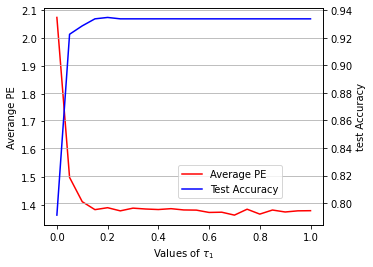

In [57]:
x = [0.05*i for i in range(21)]
lvs = np.array(lvs)
acs = np.array(acs)
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
ax1.plot(x,lvs,label="Average PE",color = 'r')
ax2 = ax1.twinx()
ax2.plot(x,acs,label="Test Accuracy",color = 'b')
ax1.set_xlabel(r'Values of $\tau_1$')
ax1.set_ylabel('Averange PE')
ax2.set_ylabel('test Accuracy')
fig.legend(loc="lower right",bbox_to_anchor=(0.8,0.2))
# plt.legend()
# ax2.legend(loc="upper right")
plt.grid()
plt.show()

In [ ]:
# output dim test
lvs = []
acs = []
for i in range(21):
    OUTPUT_DIM = 2*(i+1)
    model = utils.MCC(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)
    optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=5e-3)
    utils.train(model,optimizer,x_train,y_train,0.1)
    W = model.fc1.weight.clone().detach().numpy()
    x_r_new = x_some@W.T
    x_t_new = x_test@W.T
    acc = logistic_test(x_r_new,y_some,x_t_new,y_test)
    print("The acc of PEM (logistic) is:",acc)
    lvs.append(lv)
    acs.append(acc)

[2.07413983 1.49820447 1.41069949 1.38214052 1.38912642 1.37776029
 1.38753474 1.38441312 1.38252878 1.38564229 1.38104677 1.38040257
 1.37205768 1.37290013 1.36242414 1.38368118 1.36606348 1.38075447
 1.37367964 1.3778317  1.37835956]
[0.79124236 0.92260692 0.9287169  0.93380855 0.93482688 0.93380855
 0.93380855 0.93380855 0.93380855 0.93380855 0.93380855 0.93380855
 0.93380855 0.93380855 0.93380855 0.93380855 0.93380855 0.93380855
 0.93380855 0.93380855 0.93380855]


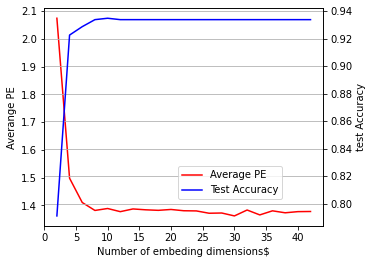

In [54]:
print(lvs)
print(acs)
# train(model,optimizer,base_means,X_sam+0.01,y_sam)
x = [2*(i+1) for i in range(21)]
lvs = np.array(lvs)
acs = np.array(acs)
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
ax1.plot(x,lvs,label="Average PE",color = 'r')
ax2 = ax1.twinx()
ax2.plot(x,acs,label="Test Accuracy",color = 'b')
ax1.set_xlabel(r'Number of embeding dimensions$')
ax1.set_ylabel('Averange PE')
ax2.set_ylabel('test Accuracy')
fig.legend(loc="lower right",bbox_to_anchor=(0.8,0.2))
# plt.legend()
# ax2.legend(loc="upper right")
plt.grid()
plt.show()